<div style="border:solid Chocolate 2px; padding: 40px">
    
 <b>Добрый день, Екатерина!</b>
    
Меня зовут Ксения Цыганова, и я буду комментировать твою работу и помогать тебе сделать ее сильнее. В Практикуме мы общаемся на «ты», но если тебе это будет некомфортно, пожалуйста, скажи, и мы будем обращаться друг к другу на «вы».
    
Все мои комментарии делятся на три вида:

    
👍 Здесь все отлично, идем дальше! - <font color='green'> зеленый цвет </font>
    
💡 Все хорошо, однако, можно оптимизировать или рассмотреть другие способы (необязательно для исполнения, чтобы пройти дальше) - <font color='gold'>желтый цвет</font>
    
🤔 Необходимо внести исправления, без которых я не смогу принять проект - <font color='red'>красный цвет</font>
    
    
Свои комментарии я буду выделять заголовком «комментарий ревьюера». Пожалуйста, не удаляй их, это поможет сократить время проверки на повторных ревью.Ты также можешь писать свои комментарии к моим и выделять их любым понравившимся способом, отличным от моего. Если у тебя будут возникать вопросы в течение нашей работы, я с радостью на них отвечу.

Цель моего ревью не критика и не возможность дать тебе готовые ответы, это способ привести тебя в нужное русло, чтобы ты смогла развить собственные идеи и решения. Твой будущий работодатель будет поступать похожим образом. 
        
   <b>У тебя все получится!</b>

<div class="alert alert-info">
Спасибо за ревью!
    
Исправления:
1. Исправила импорты
2. Изменила кодирование на порядковое
3. Кодирование провела после разделения на выборки
4. Сравниваю по метрике полученной на кроссвоалидации
5. Тестовая выборка используется только в самом конце в главе анализа результатов.

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что есть вступительный комментарий.

## Подготовка данных

In [1]:
pip install catboost --no-cache-dir

Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install lightgbm

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import KNNImputer
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from catboost import CatBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from lightgbm import LGBMRegressor
from sklearn.dummy import DummyRegressor
from sklearn.preprocessing import OrdinalEncoder

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Отлично, что все импорты собраны в одном месте в начале проекта. Это поможет в случае чего сразу увидеть, какие библиотеки следует доустановить.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

"Согласно руководству по написанию кода PEP8 все импорты должны располагаться сразу после комментариев к модулю и строк документации, но перед объявлением констант. При этом группировать их желательно в следующем порядке:

импорты из стандартной библиотеки,
импорты из сторонних библиотек,
импорты пользовательских модулей текущего проекта."
        
И между группами стоит оставлять пустую строку.
        
Вот еще хорошая статья:
        
https://okpython.net/python/python_uchebnik/osnovy/moduli_i_pakety_v_python.html
        
Какие модули входят в стандартную библиотеку можно посмотреть вот здесь:
        
https://docs.python.org/3/library/exceptions.html#warnings
    

In [4]:
#Импортируем данные
import os

pth1 = '/datasets/autos.csv'
pth2 = 'D:\\Python\\Jupyter\\autos.csv'
pth3 = 'D:\\Kate\\Python\\jupyter\\autos.csv'
pth4 = 'C:\\Users\\user\\Documents\\jupyter\\autos.csv'

if os.path.exists(pth1):
    df = pd.read_csv(pth1)
elif os.path.exists(pth2):
    df = pd.read_csv(pth2)
elif os.path.exists(pth3):
    df = pd.read_csv(pth3)
elif os.path.exists(pth4):
    df = pd.read_csv(pth4)
else:
    print('Something is wrong')

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что используешь библиотеку os для загрузки данных.

In [5]:
#Выведем на экран данные
df.head()

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [6]:
#Информация о предоставленных данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Из докуменации к проекту:

* `DateCrawled` — дата скачивания анкеты из базы
* `VehicleType` — тип автомобильного кузова
* `RegistrationYear` — год регистрации автомобиля
* `Gearbox` — тип коробки передач
* `Power` — мощность (л. с.)
* `Model` — модель автомобиля
* `Kilometer` — пробег (км)
* `RegistrationMonth` — месяц регистрации автомобиля
* `FuelType` — тип топлива
* `Brand` — марка автомобиля
* `Repaired` — была машина в ремонте или нет
* `DateCreated` — дата создания анкеты
* `NumberOfPictures` — количество фотографий автомобиля
* `PostalCode` — почтовый индекс владельца анкеты (пользователя)
* `LastSeen` — дата последней активности пользователя

В качестве предобработки данных необходимо сделать следующее:
1. Переименовать колонки согласно хорошему стилю
2. Заменить типы данных
3. Отбросить несущественные колонки с данными
4. Проверить значения на аномальные
5. Избавитьсы от пропусков
6. Удалить дубликаты
7. Проверить на корреляцию
8. Закодировать данные

In [7]:
#Разобъем названия столбцов на слова
df = df.rename(columns={'DateCrawled': 'Date Crawled', 'VehicleType': 'Vehicle Type', 'RegistrationYear': 'Registration Year', 'RegistrationMonth': 'Registration Month', 'FuelType': 'Fuel Type', 'NumberOfPictures': 'Number Of Pictures', 'PostalCode': 'Postal Code', 'LastSeen': 'Last Seen'})

In [8]:
#Добавим нижнее подчеркивание вместо пробела
df.rename(columns=lambda x: x.lower().replace(" ", "_"), inplace=True)

In [9]:
df.head(5)

,date_crawled,price,vehicle_type,registration_year,gearbox,power,model,kilometer,registration_month,fuel_type,brand,repaired,datecreated,number_of_pictures,postal_code,last_seen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что следуешь стилю языка программирования.

Переведем данные о дате в тип datatime и проверим к какому диапозону времени данные относятся

<AxesSubplot:>

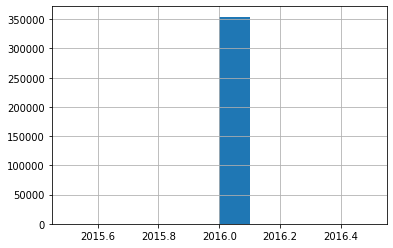

In [10]:
df['date_crawled'] = pd.to_datetime(df['date_crawled'])
df['date_crawled'].dt.year.hist()

Также проверим данные о количестве фотографий.

<AxesSubplot:>

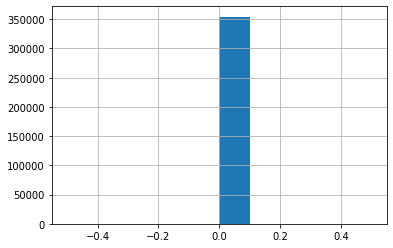

In [11]:
df['number_of_pictures'].hist()

Как видно из графика все данные относятся к 2016 году, удалим этот столбец. Во всех строках столбца с количеством фотограий стоит 0, удалим и этот столбец. Также удалим столбцы с месяцем регистрации, с временем создания анкеты, почтовым кодом и временем последней активности.

In [12]:
columns_to_drop = ['date_crawled','registration_month', 'datecreated', 'number_of_pictures', 'postal_code', 'last_seen']
df = df.drop(columns=columns_to_drop)
df.head()

,price,vehicle_type,registration_year,gearbox,power,model,kilometer,fuel_type,brand,repaired
0,480,NaN,1993,manual,0,golf,150000,petrol,volkswagen,NaN
1,18300,coupe,2011,manual,190,NaN,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,NaN
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что удаляешь неинформативные для модели признаки.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Однако можно попробовать извлечь полезную информацию из индекса.

Проверим численные данные на аномалии

In [13]:
df.describe()

,price,registration_year,power,kilometer
count,354369.000000,354369.000000,354369.000000,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535
std,4514.158514,90.227958,189.850405,37905.341530
min,0.000000,1000.000000,0.000000,5000.000000
25%,1050.000000,1999.000000,69.000000,125000.000000
50%,2700.000000,2003.000000,105.000000,150000.000000
75%,6400.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


1. В колонке с ценной присутсвуют нулевые значения и возможно нереалистично малые
2. В колонке с годом регистрации присутсвуют аномальные значения
3. Также аномальные значения есть и в `power` и `kilometer`

Сначала разберемся с аномальными значениями в столбцах с мощностью и пробегом. Предлагается заменить все значения лежащие за пределеми трех сигм методом ближайщих соседей

In [ ]:
#Столбцы для замены
cols_to_impute = ['power', 'kilometer']
df_selected = df[cols_to_impute]

#Оставляем только значения в пределах трех сигм
df_selected = df_selected[(df - df_selected.mean()).abs() <= 3 * df_selected.std()]

#Воспользуемся методом ближайщих соседей для заполнения образовавшихся пропусков
imputer = KNNImputer()
df_imputed = imputer.fit_transform(df_selected)

#Заменим значения в столбцах и проверим датафрейм
df[cols_to_impute] = df_imputed
df.head()

/tmp/ipykernel_48/1417205025.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_selected = df_selected[(df - df_selected.mean()).abs() <= 3 * df_selected.std()]


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
    
Молодец, что обрабатываешь выбросы.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь интересно посмотреть на то, какие есть уникальные значения у Kilometer.
        
Они только строго определенные и круглые. Возможно, это связано с особенностями заполнения анкеты.
        
Есть гипотеза, что можно попробовать в связи с этим перевести этот признак в категориальные. Но надо смотреть, какой из положительно отразится на метрике.

In [ ]:
df['kilometer'].hist()

<div class="alert alert-info">
Возможно имеет смысл разбить на две категории: меньше 140000 и больше. Но особого выигрыша в метрике это не дает

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
df.describe()

Пропуски в столбце `repaired` интерпретируем как `no`

In [ ]:
df['repaired'].fillna(value='no', inplace = True)
df.reset_index(drop = True, inplace = True)
df

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для отображения датасета лучше использовать методы sample, head или tail

<div class="alert alert-info">
При таком способе отображения выводит количество строк и стобцов, так можно их контролировать

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Тоже верно. Еще это можно контролировать через info()

Проверим уникальные значения в столбцах `vehicle_type`, `gearbox`, `model`, `fuel_type` и `brand`

In [ ]:
df['vehicle_type'].unique()

In [ ]:
df['gearbox'].unique()

In [ ]:
df['model'].unique()

In [ ]:
df['fuel_type'].unique()

In [ ]:
df['brand'].unique()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно также проверить данные на синонимичные категории и объединить малые категории.

<div class="alert alert-info">
Да но я поленилась гуглить все это, так как в машинах я не большой эксперт)

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
:)

Удалим пропущенные значения в столбце `gearbox`, в остальных случаях можно заменить пропуски на значение `other`, так как оно уже присутсвует там.

In [ ]:
df.dropna(subset=['gearbox'], inplace=True)
df.info()

In [ ]:
df.fillna(value='other', inplace = True)
df.reset_index()
df.info()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Да, молодец, что заметила.

Пропусков не осталось. Аномальные значения в столбце с ценой придется удалить

In [ ]:
df = df[(df['price'] > df['price'].mean() - 3 * df['price'].std()) & (df['price'] < df['price'].mean() + 3 * df['price'].std())]
df.reset_index(drop = True, inplace = True)
df

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Молодец, что орабатываешь аномалии в целевом признаке.

Аномальные значения в столбце с годом регистрации заменим по следующей схеме: удалим значения меньше 1970 и больше 2016 (так как это дата скачивания анкет)

In [ ]:
df = df[(df['registration_year'] > 1970) & (df['registration_year'] < 2016)]
df.reset_index(drop = True, inplace = True)
df.info()

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

    
<b>Все отлично!👍:</b> 
    
Молодец, что выбираешь верхнюю границу года регистрации, исходя из дат в датасете.

Проверим дубликаты

In [ ]:
df.duplicated().sum()

В данных присутсвует достаточно большое количество дубликатов, их придется удалить.

In [ ]:
df = df.drop_duplicates().reset_index(drop=True) 
df.duplicated().sum()

Построим тепловую карту корреляции количественных данных

In [ ]:
sns.heatmap(df.corr(method='spearman'), vmin=-1, vmax=1, annot=True)
plt.show()

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 

Коэффициент корреляции Пирсона (который по дефолту рассчитывается в методе corr), имеет определенные требования к данным:
    
- характер взаимосвязи двух переменных должен быть линейным и монотонным (коэффициент корреляции Пирсона не может уловить нелинейные зависимости). Поэтому, чтобы проконтроллировать корректность применения коэффициента корреляции Пирсона стоит сначала построить диаграммы рассеяния для переменных. 
    
- распределения обоих переменных, для которых рассчитывается коэффициент должны быть распределены нормально. То есть стоит построить графики распределений для переменных прежде чем изучать корреляцию. Также выбросы, ассиметрия, бимодальность негативно сказываются на адекватности использования среднего значения в качестве некоторого показателя, характеризующего нашу выборку (а коэффициент коррелиции Пирсона основан на среднем значении). Формулу можно посмотреть здесь:
    
https://studfile.net/preview/2966946/page:34/
    
Чтобы уменьшить негативное влияние выбросов можно перейти от коэффициента корреляции Пирсона к непараметрическому критерию корреляции - коэффициенту корреляции Спирмена, который уходит от реальных значенийи переходит к рангам.
    

<div class="alert alert-info">
Спасибо! Исправила! Видна небольшая корреляция между годом регистрации и мощностью

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

Заментна достаточно сильная корреляция между признаками и таргетом. Также присутсвует небольшая корреляция между годом регистрации и пробегом, но оставим эти признаки. 

Закодируем данные методом ohe

In [ ]:
#ohe = OneHotEncoder(drop='first')

# Цикл для всех столбцов датафрейма
#for col in df.columns:
    # Проверим категориальный ли столбец
#    if df[col].dtype == 'object':
        # Кодируем
#        one_hot = ohe.fit_transform(df[[col]]).toarray()
        
        # Создадим новый датафрейм с кодированными данными
#        df_encoded = pd.DataFrame(one_hot, columns=[col + "_" + str(int(i)) for i in range(one_hot.shape[1])])
        
        # Соеденим данные
#        df = pd.concat([df, df_encoded], axis=1)
        
        # Отбросим изначальные столбцы
#        df.drop([col], axis=1, inplace=True)
        
#df

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Екатерина, обрати, пожалуйста, внимание:
    
если ты проводишь кодирование с помощью кодировщиков типа OrdinalEncoder и OneHotEncoder, то стоит это делать после разделения на выборки. То есть по аналогии со StandardScaler: обучаем кодер только на тренировочной выборки, а  трансформируем все, какие есть, с помощью него.
    
Это нам помогает иммитировать работу с реальными данными. В тренировочной выборке могут оказаться не все категории, которые есть в валидации или в тесте у некоторых фичей, поэтому если не настроить кодер на обработку незнакомых категорий, код будет выдавать ошибку.
    
За обработку незнакомых категорий в OneHotEncoder отвечает параметр handle_unknown
    
С применением можно ознакомиться в документации:
    
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html
    
Также чтобы этот параметр работал вместе с drop_first достаточно обновить версию sklearn
        
!pip install scikit-learn==1.1.3
        
Важно сделать это до импорта кодера.

<div class="alert alert-info">
Исправлено, перенесла ниже

 **Вывод:**
 1. Данные содержали большое количество аномальных значений, пропусков и дубликатов.
 2. После предобработки данных получилось сохранить 260706 строк из 354369, что составляет примерно 73%. 
 3. Наблюдается небольшая корреляция между двумя признаками: годом регистрации и пробегом.
 4. Категориальные данные были закодированы методом ohe.
 5. Данные подготовлены и готовы к обучению моделей.

## Обучение моделей

Разделим на две выборки: тренировочную и тестовую

In [ ]:
#Таргет - цена автомобиля
target = df['price']

#Признаки
features = df.drop(['price'], axis=1)

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.25, random_state=12345)

features_train = features_train.reset_index()
features_test = features_test.reset_index()

#Проверим размеры выборок
print(features_train.shape, features_test.shape)

In [ ]:
ohe = OneHotEncoder(drop='first')

categorical_features = ['vehicle_type', 'gearbox', 'model', 'fuel_type', 'brand', 'repaired']

train_ohe = features_train.copy()
test_ohe = features_test.copy()

# Применяем OneHotEncoder к категориальным признакам на тренировочной и тестовой выборках
ohe_train = ohe.fit_transform(train_ohe[categorical_features])
ohe_test = ohe.transform(test_ohe[categorical_features])
                         
train_ohe_encoded = pd.DataFrame(ohe_train.toarray(), columns=ohe.get_feature_names(categorical_features))
test_ohe_encoded = pd.DataFrame(ohe_test.toarray(), columns=ohe.get_feature_names(categorical_features))  

train_ohe.drop(categorical_features, axis=1, inplace=True)
test_ohe.drop(categorical_features, axis=1, inplace=True)
train_ohe = pd.concat([train_ohe, train_ohe_encoded], axis=1)
test_ohe = pd.concat([test_ohe, test_ohe_encoded], axis=1)
                         
train_ohe.set_index('index', inplace = True)
test_ohe.set_index('index', inplace = True)
train_ohe

In [ ]:
encoder = OrdinalEncoder()

train_oe = features_train.copy()
test_oe = features_test.copy()

# Применяем OneHotEncoder к категориальным признакам на тренировочной и тестовой выборках
oe_train = encoder.fit_transform(train_oe[categorical_features])
oe_test = encoder.transform(test_oe[categorical_features])
                         
train_oe_encoded = pd.DataFrame(oe_train, columns=categorical_features)
test_oe_encoded = pd.DataFrame(oe_test, columns=categorical_features)

train_oe.drop(categorical_features, axis=1, inplace=True)
test_oe.drop(categorical_features, axis=1, inplace=True)
train_oe = pd.concat([train_oe, train_oe_encoded], axis=1)
test_oe = pd.concat([test_oe, test_oe_encoded], axis=1)
                         
train_oe.set_index('index', inplace = True)
test_oe.set_index('index', inplace = True)

train_oe.head()

<div class="alert alert-info">
Использовала порядковую кодировку. Такой вопрос: я изначально не стала ее использовать, так как думала что она используется только если категории неравнозначны, плюс я не совсем понимала как это все будет работать с масштабированием. Поэтому пришла к выводу использовать ohe

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Совместно с масштабированием можно применять.

Стандартизируем выборки. Обучим StandardScaler на тренировочной выборке и применим его к тренировочной и тестовой выборке.

In [ ]:
#numeric = ['registration_year', 'power', 'kilometer']
scaler = StandardScaler()

#Обучаем стандартизатор на тренировочной выборке
#scaler.fit(train_ohe[numeric])
#scaler.fit(train_oe[numeric])

#Применяем на двух выборках
#features_train[numeric] = scaler.transform(features_train[numeric])
#features_test[numeric] = scaler.transform(features_test[numeric])
#pd.options.mode.chained_assignment = None

#features_train

# Масштабируем признаки в датафреймах train_ohe и test_ohe
train_ohe = scaler.fit_transform(train_ohe)
test_ohe= scaler.transform(test_ohe)

# Масштабируем признаки в датафреймах train_oe и test_oe
train_oe = scaler.fit_transform(train_oe)
test_oe = scaler.transform(test_oe)
pd.options.mode.chained_assignment = None
test_oe

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Масштабирование проведено корректно, молодец!

В качестве основной метрики предлагается использовать RMSE. Напишем функцию для этой метрики

In [ ]:
def rmse(y_true, y_pred):
    y_pred = pd.Series(y_pred)
    return mean_squared_error(y_true, y_pred, squared = False)

In [ ]:
scorer = make_scorer(rmse, greater_is_better=False)

Рассмотрим несколько моделей:
1. **Ridge** - это линейная регрессионная модель, которая решает задачу линейной регрессии с L2-регуляризацией. Она является одной из классических моделей машинного обучения и обычно используется для предсказания числовых значений.

2. **DecisionTree** - это модель дерева решений, которая строит дерево решений на основе заданных признаков. Она используется для решения задач классификации и регрессии.

3. **CatBoost** - это градиентный бустинговый алгоритм, разработанный компанией Яндекс. Он основан на деревьях решений и предназначен для решения задач классификации и регрессии. CatBoost имеет ряд преимуществ перед другими бустинговыми алгоритмами, такими как устойчивость к переобучению, возможность работы с категориальными признаками и быстрое время обучения.

4. **LGBM** - это градиентный бустинговый алгоритм, использующий гистограммный подход для построения деревьев решений. Он предназначен для решения задач классификации и регрессии и является одним из наиболее быстрых и эффективных алгоритмов градиентного бустинга.

5. **Dummy** - это модель-заглушка, которая используется в качестве базовой модели при сравнении с другими моделями. Dummy не делает никаких предсказаний и всегда выдает константное значение, которое может быть задано пользователем. Она может использоваться для проверки качества других моделей и определения, насколько эффективна модель по сравнению с простой моделью-заглушкой

Каждую из этих моделей будем сравнивать по трем характеристикам: 
1. Время обучения
2. Время предсказание
3. Значение RMSE

Также применим GridSearhCV для кроссвалидации и поиска гиперпараметров.

In [ ]:
%%time
#Первой рассмотрим линейную регрессию
model = Ridge()

# Создание сетки гиперпараметров
params = {'alpha': np.logspace(-3, 3, 7)}

grid_search = GridSearchCV(model, params, cv=5, scoring = scorer)

# Обучение модели на данных с использованием GridSearchCV
grid_search.fit(train_ohe, target_train)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера №2<a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Стоит вернуть one-hot кодирование для Ridge, так как это линейная модель. Стоит подготовить выборки с разными вариантами кодирования отдельно.

<div class="alert alert-info">
<h2> Комментарий студента №2<a class="tocSkip"></h2> 
    Вернула

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
%%time

# Лучшие параметры
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
rmse_ridge = -grid_search.best_score_

#Проверим на тестовой выборке
#pred_tree = best_model.predict(features_test)

# RMSE
#rmse_ridge = rmse(target_test, pred_tree)
time_fit_ridge = grid_search.cv_results_['mean_fit_time'].sum()
time_pred_ridge = grid_search.cv_results_['mean_score_time'].sum()

print("Best Hyperparameters:", grid_search.best_params_)
print("RMSE: ", rmse_ridge)
print("Mean fit time:", time_fit_ridge)
print("Mean score time:", time_pred_ridge)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
    
Есть 2 варинта работы:
    
1. Либо разделить данные на 3 выборки (трейн, валидация и тест) и в процессе анализа качество проверять на валидационной выборке. В этом случае время на предикт также измеряем на валидационной выборке.
    
2. Либо разделять на 2 выборки (трейн и тест), и тогда качество мы оценивает на кросс-валидации, которая проводится на тренировочной выборке. А время на предикт измеряем тоже на тренировочной.
    
В обоих случаях тестовая выборка - контрольная. Нужна чтобы проконтролировать качество выбранной лучшей модели на отложенных данных.
    
Так как ты используешь GirdSearch, который проводится с помощью кросс-валидации, то качество модели можно посмотреть в его результатах.

Модель работает очень быстро, также по условию заказчика метрика RMSE должна быть меньше 2500, Ridge удовлетворяет этому критерию. 

In [ ]:
%%time
# Создание сетки гиперпараметров
param_grid = { 'max_depth': range (1,101, 10),
              'min_samples_leaf': range (1,20, 2),
              'min_samples_split': range (1,20,2) }

# Модель Дерева Решений
regressor = DecisionTreeRegressor(random_state=12345)

grid_search = GridSearchCV(regressor, param_grid, scoring = scorer, cv=5)
    
# Обучение
grid_search.fit(train_oe, target_train)


<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что подбираешь гиперпараметры.
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Для моделей на основе деревьев решений можно использовать порядковое кодирование категориальных переменных. Это может сократить время работы модели без потери качества.

<div class="alert alert-info">
Время существенно сократилось

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
%%time

# Наилучшие параметры
best_params = grid_search.best_params_

best_model = grid_search.best_estimator_
rmse_tree = -grid_search.best_score_

#pred_tree = best_model.predict(features_test)

# RMSE
#rmse_tree = rmse(target_test, pred_tree)

time_fit_tree = grid_search.cv_results_['mean_fit_time'].sum()
time_pred_tree = grid_search.cv_results_['mean_score_time'].sum()

print("Best Hyperparameters:", best_params)
print("RMSE: ", rmse_tree)
print("Mean fit time:", time_fit_tree)
print("Mean score time:", time_pred_tree)

Модель Дерева Решений показала лучшее значение RMSE, но чрезвычайно долгое время обучения.

In [ ]:
%%time

# Создание сетки гиперпараметров
params = {
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 500, 1000]
}

# CatBoostRegressor
model = CatBoostRegressor(random_state=12345)

# Обучение
grid_search = GridSearchCV(model, param_grid=params, scoring = scorer, cv=5)
grid_search.fit(train_oe, target_train)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
Для CatBoost стоит использовать порядковое кодирование категориальных переменных.
    
Либо воспользоваться внутренним алгоритмом кодирования, то есть подавать в модель незакодированные предварительно фичи.
    
Пример:
    
https://towardsdatascience.com/how-do-you-use-categorical-features-directly-with-catboost-947b211c2923

<div class="alert alert-info">
Исправила

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
%%time

best_model_cat = grid_search.best_estimator_
rmse_CatBoost = -grid_search.best_score_ 
#pred_cat = best_model.predict(features_test)

# RMSE
#rmse_catboost = rmse(target_test, pred_cat)

time_fit_cat = grid_search.cv_results_['mean_fit_time'].sum()
time_pred_cat = grid_search.cv_results_['mean_score_time'].sum()

print("Best Hyperparameters:", grid_search.best_params_)
print("RMSE:", rmse_CatBoost)
print("Mean fit time:", time_fit_cat)
print("Mean score time:", time_pred_cat)

CatBoost дает хорошее RMSE, а также обучение и предсказание происходит быстрее.

In [ ]:
%%time

#LGBMRegressor
model_LGBM = LGBMRegressor()

# Создание сетки гиперпараметров
params = {
    'learning_rate': [0.05, 0.1, 0.2],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'num_leaves': [5, 10, 15]
}

#Обучение
grid = GridSearchCV(estimator=model_LGBM, param_grid=params, cv=5, scoring=scorer)
grid.fit(train_oe, target_train)

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
        
        
Для LightGBM стоит использовать порядковое кодирование категориальных переменных или воспользоваться внутренним алгоритмом кодирования, то есть подавать в модель незакодированные предварительно фичи.
    
Пример:
    
https://www.kaggle.com/code/mlisovyi/beware-of-categorical-features-in-lgbm

<div class="alert alert-info">
    Исправила

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

In [ ]:
%%time

best_model = grid.best_estimator_
rmse_LGBM = -grid.best_score_
#pred_LGBM = best_model.predict(features_test)

#RMSE
#rmse_LGBM = rmse(target_test, pred_LGBM)
time_fit_LGBM = grid.cv_results_['mean_fit_time'].sum()
time_pred_LGBM = grid.cv_results_['mean_score_time'].sum()

print("Best Hyperparameters:", grid.best_params_)
print("RMSE:", rmse_LGBM)
print("Mean fit time:", time_fit_LGBM)
print("Mean score time:", time_pred_LGBM)

Бустинговый алгоритм LightGBM также дает хорошую метрику RMSE, при этом обучается быстрее. Время предсказания самое долгое.

In [ ]:
%%time

#Сравним значения с константной моделью
dummy = DummyRegressor()
dummy.fit(train_oe, target_train)

In [ ]:
%%time

pred_dummy = dummy.predict(test_oe)
rmse_dummy = rmse(target_test, pred_dummy)
print("RMSE Dummy:", rmse_dummy)

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Молодец, что сравниваешь качество с константной моделью.

Были обучены 5 различных моделей, с различным методами обучения. Для всех измерены время обучения и предсказание, а также значение RMSE на тестовой выборке. Проанализируем результаты.

## Анализ моделей

Для удобного анализы соберем все полученные значения в датафрейм. Время обучения приведем к минутам, а время предсказания округлим до милисекунды.

In [ ]:
col  = ['ridge', 'DisissionTree', 'CatBoost', 'LGBM', 'dummy']
time_fit = [time_fit_ridge, time_fit_tree, time_fit_cat, time_fit_LGBM, 0]
time_pred = [time_pred_ridge, time_pred_tree, time_pred_cat, time_pred_LGBM, 0]
RMSE = [rmse_ridge, rmse_tree, rmse_CatBoost, rmse_LGBM, rmse_dummy]

In [ ]:
results = pd.DataFrame({'ridge': [time_fit[0], time_pred[0], RMSE[0]],
                   'DecisionTree': [time_fit[1], time_pred[1], RMSE[1]],
                   'CatBoost': [time_fit[2], time_pred[2], RMSE[2]],
                   'LGBM': [time_fit[3], time_pred[3], RMSE[3]],
                   'dummy': [time_fit[4], time_pred[4], RMSE[4]]},
                  index=['time_fit', 'time_pred', 'RMSE'])
results

<div class="alert alert-success">
<h2> Комментарий ревьюера <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Отлично, что сводишь все результаты в таблицу.

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Чтобы при изменениях или перезапусках не было несоответствия, стоит сохранять все результаты в переменные, а не вписывать числа вручную

<div class="alert alert-info">
Каким образом сохранить в переменную результат %%time?

<div class="alert alert-warning">
    <h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Можно использовать другой метод:
        
https://ru.stackoverflow.com/questions/1402801/%D0%BA%D0%B0%D0%BA-%D0%B8%D0%B7%D0%BC%D0%B5%D1%80%D0%B8%D1%82%D1%8C-%D0%B2%D1%80%D0%B5%D0%BC%D1%8F-%D0%B2%D1%8B%D0%BF%D0%BE%D0%BB%D0%BD%D0%B5%D0%BD%D0%B8%D1%8F-%D0%BA%D0%BE%D0%B4%D0%B0-%D0%B2-python

Для наглядности построим график отображающий наибольшее значение в каждой из категорий среди всех моделей.

In [ ]:
# Set the style of the plots
sns.set_style('whitegrid')

# Create subplots
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(8, 6))

# Plot for time_fit
sns.heatmap(results.loc[['time_fit']], ax=axs[0], cmap='coolwarm', annot=True, fmt='.0f', cbar=False)
axs[0].set_ylabel('')

# Plot for time_pred
sns.heatmap(results.loc[['time_pred']], ax=axs[1], cmap='coolwarm', annot=True, fmt='.0f', cbar=False)
axs[1].set_ylabel('')

# Plot for rmse
sns.heatmap(results.loc[['RMSE']], ax=axs[2], cmap='coolwarm', annot=True, fmt='.0f', cbar=False)

# Set titles and labels for the plots
axs[0].set_title('Скорость обучения')
axs[1].set_title('Скорость предсказания')
axs[2].set_title('Качество модели')

# Rotate the tick labels for x-axis
for ax in axs.flat:
    plt.setp(ax.get_xticklabels(), rotation=0)

plt.tight_layout()
plt.show()

In [ ]:
pred_cat = best_model_cat.predict(test_oe)

# RMSE
rmse_catboost = rmse(target_test, pred_cat)
rmse_catboost

Из этих значений можно сделать несколько выводов:

1. **CatBoost** и **LGBM** демонстрируют наилучшие результаты по метрике RMSE среди всех моделей. Это может означать, что они лучше всего справляются с предсказанием целевой переменной.

2. **Ridge** и **dummy** модели имеют наихудшие результаты по метрике RMSE среди всех моделей. Ridge может быть менее подходящей моделью для этой задачи, а dummy модель является константной.

3. **DecisionTree** имеет наибольшее время обучения. Это может означать, что эта модель более сложная или требует более высокой вычислительной мощности для обучения.

4. **LGBM** модель имеет наибольшее время предсказания. Это может означать, что эта модель более сложная или требует более высокой вычислительной мощности для предсказания.

5. Исходя из этих выводов, можно сделать вывод, что **CatBoost** и **LGBM**, вероятно, являются наиболее подходящими моделями для данной задачи, но использование этих моделей может требовать большего времени и вычислительной мощности, чем другие модели.

<div class="alert alert-block alert-danger">
<h2> Комментарий ревьюера <a class="tocSkip"></h2>

    
<b>На доработку🤔:</b>
    
После того, как выбрана лучшая модель по результатам на кросс-валидации и по времени стоит проверить ее на тестовой выборке. Ранее по проекту использование тестовой выборки стоит исключить.

<div class="alert alert-info">
    Добавила предсказания CatBoost на тестовой выборке
    
Среди рассмотренных моделей выбрана модель CatBoost в качестве оптимальной.CatBoost показала сопоставимые результаты метрики RMSE с моделью LightGBM. При этом время обучения модели CatBoost было заметно меньше, чем у LightGBM.

<div class="alert alert-success">
<h2> Комментарий ревьюера №2<a class="tocSkip"> </h2>

<b>Все отлично!👍</b> 
    

<div class="alert alert-warning">
    <h2> Комментарий ревьюера <a class="tocSkip"> </h2>
    
<b>Некоторые замечания и рекомендации💡:</b> 
        
Здесь я оставлю несколько интересных и полезных ссылок по теме:
        
        
1. "XGBoost, LightGBM or CatBoost — which boosting algorithm should I use?"

https://medium.com/riskified-technology/xgboost-lightgbm-or-catboost-which-boosting-algorithm-should-i-use-e7fda7bb36bc
        
        
2. "Transforming categorical features to numerical features"
        
https://catboost.ai/en/docs/concepts/algorithm-main-stages_cat-to-numberic
        
        
3. "Градиентный Бустинг: самый частый вопрос на собеседовании на дата саентиста"
        
https://www.youtube.com/watch?v=ZNJ3lKyI-EY
        
4. "Tutorial: CatBoost Overview"
        
https://www.kaggle.com/code/mitribunskiy/tutorial-catboost-overview/notebook
        
5. "Gradient Boosting from scratch"
        
https://blog.mlreview.com/gradient-boosting-from-scratch-1e317ae4587d

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту</b>

Екатерина, спасибо за работу! Проект отличный, продуманный, структурно выдержанный и аккуратный. Видно, что ты вдумчиво подходишь к работе. Однако стоит внести некоторые исправления, чтобы можно было считать проект завершенным.

**Положительные моменты проекта, которые хочу еще раз подчеркнуть:**

1. Удалены лишние признаки и константный признак
2. Есть промежуточные выводы по ходу анализа признаков
3. Есть обработка некорректных и пропущенных значений
4. Кодирование категориальных признаков осуществляется.
5. Есть анализ времени предсказания и обучения моделей
6. Аккуратность кода на высоком уровне.
7. Масштабирование численных призаков осуществляется корректно

    
**Замечания, на которые стоит обратить внимание при будущей работе:**
    
    1. Кодировать стоит после разделения на выборки
    2. Для LightGBM и CatBoost стоит использовать соответствующий метод кодирования
    3. Время предсказания, когда есть только тренировочная и тестовая выборки, стоит измерять на тренировочной выборке
    4. Модели выбирать по результатам кросс-валидации
    5. На тестовой выборке стоит проверять только лучшую модель

    
    
Остальные комментарии ты найдешь выше.

**Желаю удачи и жду твой проект на повторное ревью!**

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №2</b>

Екатерина, спасибо за работу!
    
К сожелению, не увидела отдельного измерения времени выполнения операций fit и predict для каждой из моделей. Стоит добавить это в анализ. Так как для всех моделей ты используешь GridSearchCV, То результаты по времени можно также достать оттуда, из словаря cv_results_
 
Ключи:
    
'mean_fit_time' 
    
'mean_score_time'
    
https://scikit--learn-org.translate.goog/stable/modules/generated/sklearn.model_selection.GridSearchCV.html?_x_tr_sl=en&_x_tr_tl=ru&_x_tr_hl=ru&_x_tr_pto=sc
    
Также для Ridge стоит оставить выборки с one-hot кодированием категориальных переменных, и масштабированием численных переменных.
    
**Жду твой проект на следующее ревью**
    
    

<div class="alert alert-info">
<h2> Комментарий студента №2<a class="tocSkip"></h2> 
Добавила измерение времяни из gridSearch, также вернула ohe в Ridge

<div style="border:solid Chocolate 2px; padding: 40px">
    
<b>Общий вывод по проекту №3</b>

Екатерина, спасибо за работу,
    
**проект принимаю и желаю успехов в дальнейшем!**    
    

## Чек-лист проверки

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [ ]  Весь код выполняется без ошибок
- [ ]  Ячейки с кодом расположены в порядке исполнения
- [ ]  Выполнена загрузка и подготовка данных
- [ ]  Выполнено обучение моделей
- [ ]  Есть анализ скорости работы и качества моделей